## Importing the data from kaggle into google colab

In [ ]:
#import os
import os
import gc
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/SCAMP/car price prediction"

In [ ]:
#change the directory
%cd /content/drive/MyDrive/SCAMP/car price prediction

/content/drive/MyDrive/SCAMP/car price prediction


In [ ]:
#check if the directory has been changed
!pwd

/content/drive/MyDrive/SCAMP/car price prediction


In [ ]:
gc.collect()

153

In [ ]:
#import and download the dataset
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 98% 258M/262M [00:02<00:00, 122MB/s]
100% 262M/262M [00:02<00:00, 119MB/s]


In [ ]:
##check if the dataset has been downloaded
!ls

'Car Price Prediction.ipynb'	  kaggle.json	    vehicles.csv
 craigslist-carstrucks-data.zip   new_vehicle.csv


In [ ]:
#unzip the dataset
!unzip \*.zip  && rm *.zip

Archive:  craigslist-carstrucks-data.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
gc.collect()

50

## Import neccessary libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gc

In [3]:
#read the data using pandas
data = pd.read_csv('/content/drive/MyDrive/SCAMP/car price prediction/vehicles.csv')
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
gc.collect()

73

In [5]:
#make a copy of the dataset
data1 = data.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
gc.collect()

50

## Data Cleaning

In [8]:
#check the statistical description of the dataset
data.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,5,NaN,6,3,118264,3,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://tulsa.craigslist.org/ctd/d/tulsa-2010-...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [9]:
#check the columns in the data
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [10]:
gc.collect()

114

In [11]:
data.shape

(426880, 26)

In [12]:
#check for missing values
data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [13]:
gc.collect()

150

In [14]:
#check for missing values percentage
null=data.isnull().sum()
null=pd.DataFrame(null,columns=['null'])
j=1
sum_tot=len(data)
null['percent']=null['null']/sum_tot
round(null*100,3).sort_values('percent',ascending=False)

,null,percent
county,42688000,100.000
size,30636100,71.767
cylinders,17767800,41.622
condition,17410400,40.785
VIN,16104200,37.725
drive,13056700,30.586
paint_color,13020300,30.501
type,9285800,21.753
manufacturer,1764600,4.134
title_status,824200,1.931


In [15]:
gc.collect()

112

In [16]:
#drop the some columns that are not required for the analysis
data.drop(columns=['id','url', 'region_url', 'VIN', 'image_url', 'lat', 'long','county','size', 'posting_date'], axis=1, inplace=True)

In [17]:
#Converting strings within the description column to lower case

data['new_description'] = data['description'].astype(str).apply(lambda x: x.lower())

data['new_description']

0                                                       nan
1                                                       nan
2                                                       nan
3                                                       nan
4                                                       nan
                                ...                        
426875    carvana is the safer way to buy a car during t...
426876    carvana is the safer way to buy a car during t...
426877    carvana is the safer way to buy a car during t...
426878    carvana is the safer way to buy a car during t...
426879    carvana is the safer way to buy a car during t...
Name: new_description, Length: 426880, dtype: object

In [18]:
data.sample(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,new_description
187033,boston,28000,2014.0,ford,f250 super duty 4x4,NaN,8 cylinders,gas,99000.0,clean,automatic,4wd,NaN,NaN,2014 FORD F 250 SUPER DUTY CREW CAB SHORT BED ...,ma,2014 ford f 250 super duty crew cab short bed ...
320286,medford-ashland,49995,2014.0,ford,super duty f-350 drw,NaN,8 cylinders,diesel,79997.0,clean,automatic,4wd,truck,black,This 2014 Ford Super Duty F-350 DRW Platinum h...,or,this 2014 ford super duty f-350 drw platinum h...
248856,las vegas,14999,2016.0,hyundai,santa fe sport,NaN,NaN,gas,89830.0,clean,automatic,NaN,SUV,grey,Vehicle Description***LED HEADLIGHTS***BLUETOO...,nv,vehicle description***led headlights***bluetoo...
145518,southern illinois,32822,2020.0,ford,explorer,NaN,NaN,gas,12407.0,clean,automatic,NaN,NaN,NaN,"Pennington Ford, and our sister store, right a...",il,"pennington ford, and our sister store, right a..."
124689,brunswick,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,ga,carvana is the safer way to buy a car during t...
37512,modesto,27250,2017.0,honda,cr-v,NaN,4 cylinders,gas,22015.0,clean,automatic,fwd,SUV,blue,Folsom Lake HondaAsk for: Sean Cooley☎ (916) 3...,ca,folsom lake hondaask for: sean cooley☎ (916) 3...
424662,milwaukee,11995,2016.0,ford,fusion,excellent,4 cylinders,gas,66637.0,rebuilt,automatic,fwd,sedan,grey,"2016 Ford Fusion SE, 4-Cyl EcoBoost Turbo 1.5T...",wi,"2016 ford fusion se, 4-cyl ecoboost turbo 1.5t..."
148556,"st louis, MO",2750,2006.0,toyota,scion xb,NaN,NaN,gas,173670.0,clean,manual,NaN,NaN,NaN,!! WOW !! CASH CAR !! WON'T LAST LONG !! MANU...,il,!! wow !! cash car !! won't last long !! manu...
326042,salem,59990,2012.0,NaN,International 7300,excellent,NaN,diesel,74894.0,clean,automatic,4wd,NaN,white,2012 *** International 7300 *** Ready To U...,or,2012 *** international 7300 *** ready to u...
69373,visalia-tulare,12995,2016.0,volkswagen,passat 1.8t se,excellent,4 cylinders,gas,66232.0,clean,automatic,fwd,sedan,custom,2016 Volkswagen Passat 1.8T SE Blind-Spot D...,ca,2016 volkswagen passat 1.8t se blind-spot d...


In [19]:
gc.collect()

215

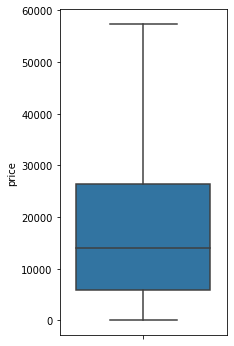

In [20]:
#plot a boxplot to check the price column
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=data,showfliers=False)

In [21]:
p=sorted(data["price"])

In [22]:
quantile1, quantile3= np.percentile(p,[10,90])
print(quantile1,quantile3)

500.0 37590.0


In [23]:
data=data[(data.price < 37590) & (data.price >= 500 )]
data.shape

(341976, 17)

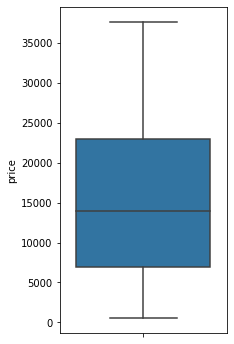

In [24]:
#plot a boxplot to check the price column again
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=data,showfliers=False)

In [25]:
gc.collect()

50

In [26]:
data.shape

(341976, 17)

In [27]:
gc.collect()

100

In [28]:
gc.collect()

50

In [29]:
#check for top 10 car manufacturing years
print ('Top 10 car manufacturing years:')
print (data['year'].value_counts().iloc[:10])

Top 10 car manufacturing years:
2013.0    26740
2017.0    25901
2014.0    24469
2018.0    24432
2015.0    23995
2016.0    22820
2012.0    21028
2011.0    18155
2008.0    15959
2019.0    14689
Name: year, dtype: int64


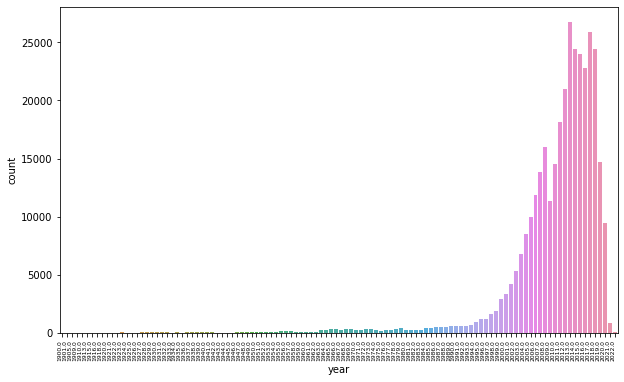

In [30]:
#countplot for the year column
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

In [31]:
gc.collect()

87

In [32]:
#drop rows from with containing less than 1960 
data.drop(data[data.year < 1960].index, inplace = True)
data.drop(data[data.year > 2021].index,inplace=True)
data=data.dropna(subset=['year'])

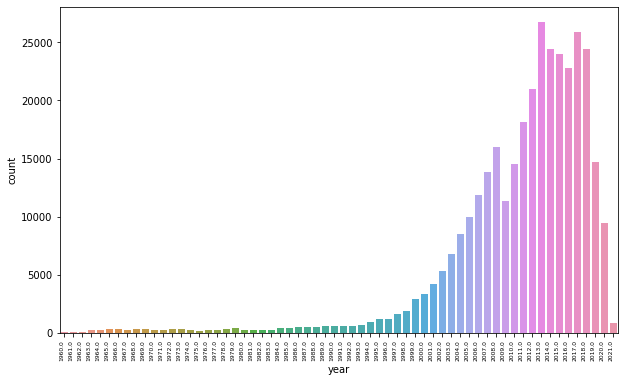

In [33]:
#countplot to check if the year column is balanced
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

In [34]:
gc.collect()

15859

In [35]:
gc.collect()

50

In [36]:
#check the top 10 region
print (data['region'].value_counts().iloc[:10])

columbus          3080
milwaukee         2777
jacksonville      2651
central NJ        2635
south florida     2634
nashville         2633
grand rapids      2619
north jersey      2608
tampa bay area    2607
south jersey      2599
Name: region, dtype: int64


In [37]:
gc.collect()

100

In [38]:
#check the maximum odometer in the dataset
data.odometer.max()

10000000.0

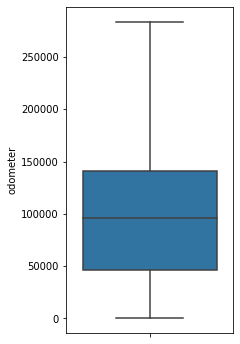

In [39]:
#plot a boxplot to check the price column
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=data,showfliers=False)

In [40]:
#check for rows containing odometer greater than 300000 
max_data=pd.DataFrame(data, columns=['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status'])
max_odo=max_data[max_data['odometer']>300000]
max_odo.sample(50)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status
370269,1500,1998.0,toyota,4runner sr5,good,6 cylinders,gas,335892.0,clean
279563,9000,2006.0,volvo,vnl780,NaN,NaN,diesel,1350000.0,clean
193687,3500,2005.0,ford,f-150,good,8 cylinders,gas,314000.0,clean
354749,9950,1992.0,gmc,sonoma,excellent,8 cylinders,gas,311000.0,clean
402606,22500,2003.0,ram,3500,like new,6 cylinders,diesel,999999.0,clean
262480,27999,2020.0,ford,escape,NaN,NaN,gas,999999.0,clean
40938,1600,1993.0,jeep,grand cherokee,fair,6 cylinders,gas,328763.0,clean
383125,8500,2006.0,toyota,tacoma,NaN,NaN,gas,325000.0,clean
37369,8000,1995.0,gmc,sierra 3500,NaN,NaN,diesel,321000.0,clean
231590,5500,2006.0,NaN,2006 SILVERADO 2500 HD,excellent,8 cylinders,gas,330500.0,clean


In [41]:
gc.collect()

112

In [42]:
#check for rows containing odometer greater than 300000 
data.drop(data[data.odometer > 300000].index, inplace = True)
data.drop(data[data["odometer"] < 10000].index,inplace=True)

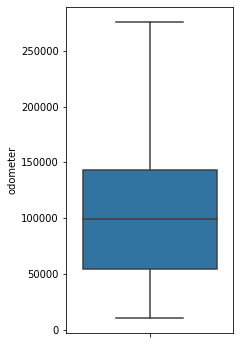

In [43]:
#plot a boxplot to check the price column
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=data,showfliers=False)

In [44]:
data.shape

(320751, 17)

In [45]:
gc.collect()

100

In [46]:
drive = data.groupby('drive')['drive'].count()
drive

drive
4wd    91797
fwd    88393
rwd    43457
Name: drive, dtype: int64

In [47]:
#Creating a new column for drive by searching for occurrences of the 3 drive types within the description column


data['newdrive'] = data.new_description.str.findall('(4wd|fwd|rwd)')

data['newdrive'] = data['newdrive'].apply(', '.join)

#if drive is NAN, replace with the value in 'new_drive'
data.loc[data['drive'].isnull(), 'drive'] =  data['newdrive']

In [48]:
data[['drive','newdrive']].sample(50)

,drive,newdrive
190366,4wd,"4wd, 4wd, 4wd, 4wd"
56358,"4wd, 4wd","4wd, 4wd"
156862,4wd,
180680,rwd,rwd
60220,fwd,fwd
262886,fwd,fwd
152455,rwd,rwd
291103,4wd,"4wd, 4wd, 4wd"
282070,4wd,
63802,4wd,"4wd, 4wd"


In [49]:
data.drive.isnull().sum()

0

In [50]:
type = data.groupby('type')['type'].count()
type

type
SUV            60661
bus              376
convertible     6016
coupe          13455
hatchback      14041
mini-van        4363
offroad          499
other          13531
pickup         30043
sedan          70968
truck          20901
van             6781
wagon           9179
Name: type, dtype: int64

In [51]:
data['new_type'] = data.new_description.str.findall('(suv|bus|convertible|coupe|hatchback|mini-van|offroad|pickup|sedan|truck|van|wagon)').apply(', '.join)

data.loc[data['type'].isnull(), 'type'] =  data['new_type']

In [52]:
data[['type','new_type']].sample(50)

,type,new_type
46114,other,"van, van, van, van, van, van, van, van, van, v..."
137759,"van, van, van, pickup, truck","van, van, van, pickup, truck"
282896,bus,truck
109803,coupe,"van, van, van, van, van, van, van, van, van, v..."
253173,coupe,"coupe, coupe, coupe, coupe, coupe, coupe, coup..."
67238,SUV,
113121,,
87441,sedan,"sedan, van, sedan"
414103,van,"van, van, van, van, van, truck, truck, truck, ..."
51797,coupe,"van, van, van, van, van, van, van, van, van, v..."


In [53]:
data[data['type'] == ''].sum

<bound method DataFrame.sum of             region  price  ...  newdrive new_type
37          auburn   4500  ...                   
171     birmingham   5900  ...                   
195     birmingham  34995  ...                   
196     birmingham   3200  ...                   
197     birmingham   3495  ...                   
...            ...    ...  ...       ...      ...
426681     wyoming  18500  ...                   
426686     wyoming  28900  ...                   
426690     wyoming   6500  ...                   
426718     wyoming   6500  ...                   
426813     wyoming   1000  ...                   

[33871 rows x 19 columns]>

In [54]:
gc.collect()

185

In [55]:
paint_color = data.groupby('paint_color')['paint_color'].count()
paint_color

paint_color
black     46379
blue      25314
brown      5479
custom     5401
green      6162
grey      20124
orange     1497
purple      552
red       23299
silver    35273
white     57514
yellow     1613
Name: paint_color, dtype: int64

In [56]:
data['new_paint_color'] = data.new_description.str.findall('(black|blue|brown|custom|green|grey|orange|purple|red|silver|white|yellow|gray)').apply(', '.join)

data.loc[data['paint_color'].isnull(), 'paint_color'] =  data['new_paint_color']

In [57]:
data['new_manufacturer'] = data.new_description.str.findall('(volvo|volkswagen|toyota|tesla|subaru|saturn|rover|ram|porsche|pontiac|nissan|morgan|mitsubishi|mini|mercury|mercedes-benz|mazda|lincoln|lexus|land rover|kia|jeep|jaguar|infiniti|hyundai|honda|hennessey|harley-davidson|gmc|ford|fiat|ferrari|dodge|datsun|chrysler|chevrolet|cadillac|buick|bmw|audi|aston-martin|alfa-romeo|acura)').apply(', '.join)

data.loc[data['manufacturer'].isnull(), 'manufacturer'] =  data['new_manufacturer']


In [58]:
data[['manufacturer','new_manufacturer']]

,manufacturer,new_manufacturer
27,gmc,"gmc, ram, gmc, gmc, gmc, gmc, gmc, gmc, gmc, gmc"
28,chevrolet,"chevrolet, ram, chevrolet, chevrolet, chevrole..."
30,toyota,"toyota, ram, toyota, toyota, toyota, toyota, t..."
31,ford,
32,gmc,"gmc, ram, gmc, gmc, gmc, gmc, gmc, gmc, gmc, gmc"
...,...,...
426874,lexus,"lexus, ram, lexus, lexus, lexus, lexus, lexus,..."
426875,nissan,"nissan, ram, nissan, nissan, nissan, nissan, n..."
426876,volvo,"volvo, ram, volvo, volvo, volvo, volvo, volvo,..."
426878,lexus,"lexus, ram, lexus, lexus, lexus, lexus, lexus,..."


In [59]:
#Drop all new columns
#Drop all columns worked on that have more than one entry
data = data.drop(columns=['new_description','newdrive','new_type','new_paint_color','new_manufacturer'])

new_data = data[data['paint_color'].str.split().str.len()<2]
new_data = new_data[new_data['type'].str.split().str.len()<2]
new_data = new_data[new_data['drive'].str.split().str.len()<2]
new_data = new_data[new_data['drive'].str.split().str.len()<3]
new_data = new_data[new_data['manufacturer'].str.split().str.len()<2]

new_data = new_data. replace(r'^\s*$', np. nan, regex=True)

In [60]:
new_data.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state
102571,ocala,32990,2013.0,tesla,model s signature,good,NaN,electric,62588.0,clean,other,rwd,sedan,white,Carvana is the safer way to buy a car During t...,fl
97140,gainesville,11995,2017.0,hyundai,elantra,NaN,4 cylinders,gas,87712.0,clean,automatic,fwd,sedan,blue,This Hyundai Elantra can be yours today!If you...,fl
242980,raleigh / durham / CH,16900,1986.0,bmw,635csi,excellent,6 cylinders,gas,109700.0,clean,manual,rwd,coupe,black,Excellent condition 1986 BMW 635csi. All orig...,nc
387341,vermont,13995,2012.0,toyota,rav4 limited v6,excellent,6 cylinders,gas,105610.0,clean,automatic,4wd,SUV,grey,~~~~~~~ 2012 TOYOTA RAV4 LIMITED V6 ~~~~~~~ ...,vt
279732,rochester,7500,2012.0,dodge,caliber sxt,excellent,4 cylinders,gas,65200.0,clean,automatic,fwd,suv,white,2012 Dodge Caliber SXT 4Door Automatic 4 cyl...,ny


In [61]:
new_data.isnull().sum()

region              0
price               0
year                0
manufacturer     4242
model            2441
condition       79065
cylinders       80868
fuel             1380
odometer         1076
title_status     1005
transmission      863
drive           56343
type            28982
paint_color     22440
description         1
state               0
dtype: int64

In [62]:
#value count for condition column
new_data.condition.value_counts()

good         80858
excellent    66691
like new     14398
fair          5683
salvage        472
new            404
Name: condition, dtype: int64

In [63]:
gc.collect()

64

In [64]:
#check the average odometer for different condition
excellent= new_data[new_data['condition'] == 'excellent']['odometer'].mean()
good = new_data[new_data['condition'] == 'good']['odometer'].mean()
like_new = new_data[new_data['condition'] == 'like new']['odometer'].mean()
salvage = new_data[new_data['condition'] == 'salvage']['odometer'].mean()
fair = new_data[new_data['condition'] == 'fair']['odometer'].mean()

In [65]:
#fill in the missing values with the average odometer corresponding each condition
new_data.loc[new_data['odometer'] <= like_new, 'condition'] = new_data.loc[new_data['odometer'] <= like_new, 'condition'].fillna('like new')
new_data.loc[new_data['odometer'] >= fair, 'condition'] = new_data.loc[new_data['odometer'] >= fair, 'condition'].fillna('fair')

new_data.loc[((new_data['odometer'] > good) & (new_data['odometer'] <= excellent)), 'condition'] = new_data.loc[((new_data['odometer'] > good) & (new_data['odometer'] <= excellent)), 'condition'].fillna('excellent')

new_data.loc[((new_data['odometer'] > like_new) & (new_data['odometer'] <= good)), 'condition'] = new_data.loc[((new_data['odometer'] > like_new) & (new_data['odometer'] <= good)), 'condition'].fillna('good')

new_data.loc[((new_data['odometer'] > good) & (new_data['odometer'] <= fair)), 'condition'] = new_data.loc[((new_data['odometer'] > good) & (new_data['odometer'] <= fair)), 'condition'].fillna('salvage')

In [66]:
gc.collect()

89

In [67]:
#drop columns with less than 5% missing values
new_data=new_data.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

In [68]:
#value count for cylinders column
new_data.cylinders.value_counts()

6 cylinders     61744
4 cylinders     56413
8 cylinders     39859
5 cylinders      1364
10 cylinders      724
other             490
3 cylinders       319
12 cylinders       65
Name: cylinders, dtype: int64

In [69]:
#forward fill the missing rows in different columns
new_data['paint_color'] = new_data['paint_color'].fillna(method='ffill')
new_data['drive'] = new_data['drive'].fillna(method='ffill')
new_data['type'] = new_data['type'].fillna(method='ffill')
new_data['cylinders'] = new_data['cylinders'].fillna(method='ffill')

In [70]:
gc.collect()

200

In [71]:
#drop the missing values in columns
new_data=new_data.dropna(subset=['drive', 'odometer', 'condition'])
new_data.drop('description', axis=1, inplace=True)

In [72]:
#check if the data cleaned
new_data.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [73]:
new_data.shape

(236908, 15)

In [74]:
gc.collect()

200

## Data Analysis

In [77]:
#check for the unique manufacturers
print(new_data['manufacturer'].unique())

['toyota' 'ford' 'gmc' 'chevrolet' 'jeep' 'nissan' 'ram' 'cadillac'
 'honda' 'dodge' 'lexus' 'jaguar' 'chrysler' 'volvo' 'infiniti' 'lincoln'
 'subaru' 'acura' 'hyundai' 'mercedes-benz' 'audi' 'bmw' 'mitsubishi'
 'alfa-romeo' 'volkswagen' 'mazda' 'porsche' 'kia' 'buick' 'pontiac'
 'fiat' 'rover' 'tesla' 'mercury' 'saturn' 'mini' 'harley-davidson'
 'datsun' 'morgan' 'ferrari' 'aston-martin']


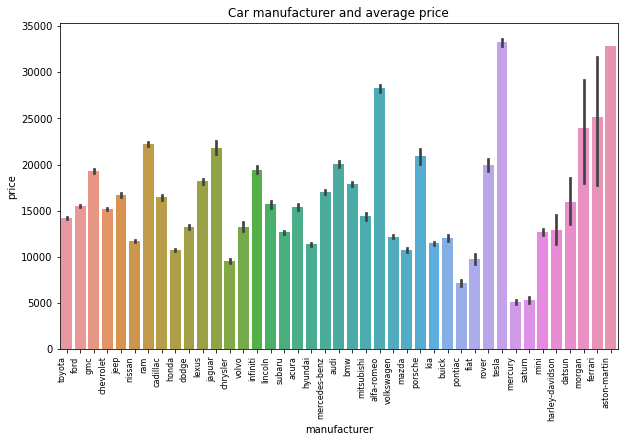

In [95]:
#plot the unique manufacturers and the average car price they manufactured
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=new_data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Car manufacturer and average price");

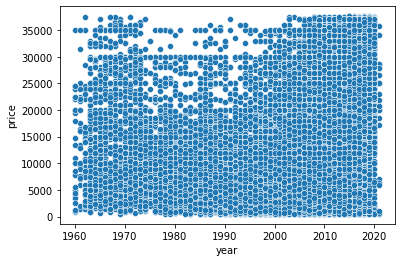

In [79]:
#plot a scatterplot to check the relationship between year and price
bx = sns.scatterplot(x="year", y="price", data=new_data)

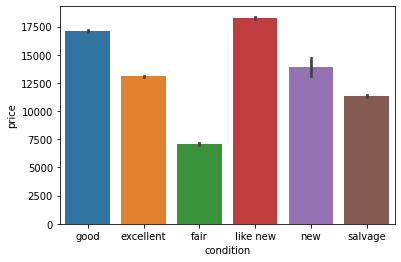

In [80]:
ax = sns.barplot(x="condition", y="price", data=new_data)

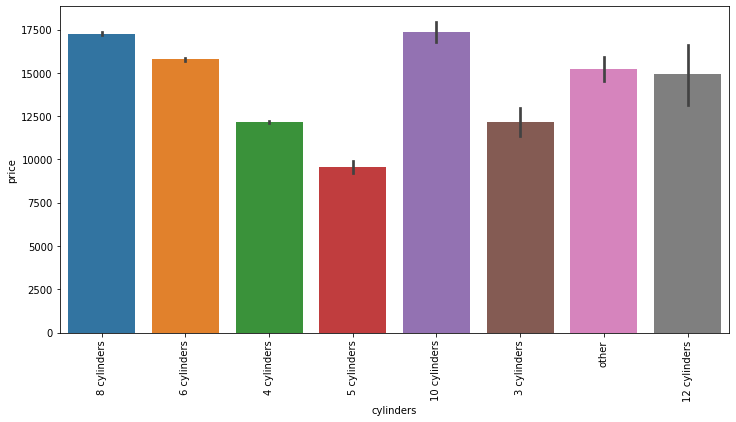

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='cylinders', y='price', data=new_data, ax=ax)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
gc.collect()

165199

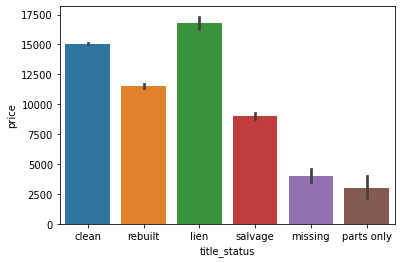

In [83]:
ax = sns.barplot(x="title_status", y="price", data=new_data)

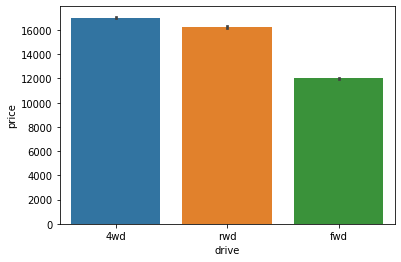

In [84]:
ax = sns.barplot(x="drive", y="price", data=new_data)

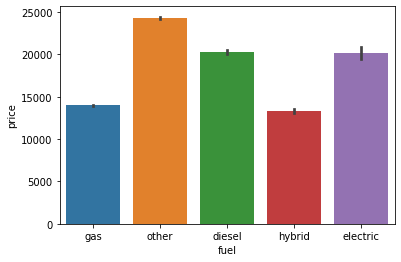

In [86]:
ax = sns.barplot(x="fuel", y="price", data=new_data)

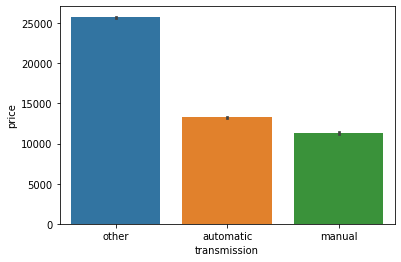

In [87]:
ax = sns.barplot(x="transmission", y="price", data=new_data)

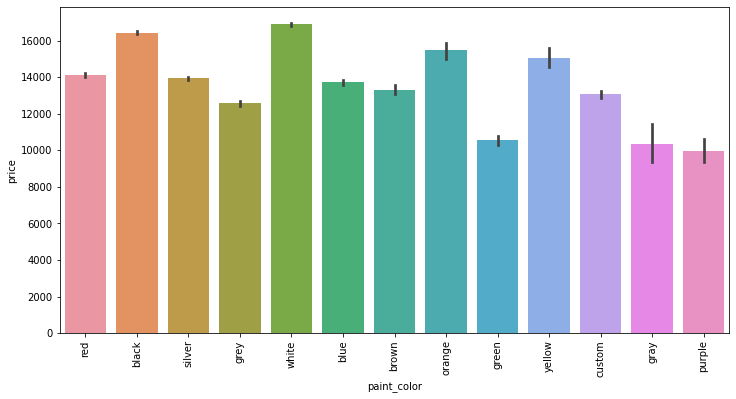

In [88]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='paint_color', y='price', data=new_data, ax=ax)
plt.xticks(rotation='vertical')
plt.show()

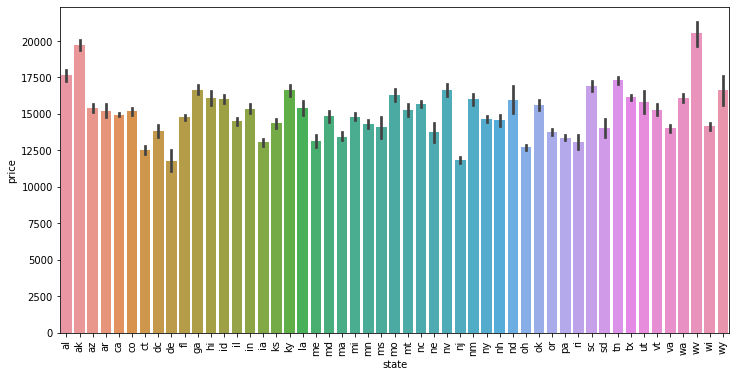

In [89]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='state', y='price', data=new_data, ax=ax)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
new_data.sample(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
317721,eugene,13995,2009.0,ford,explorer sport trac,excellent,6 cylinders,gas,93155.0,clean,automatic,4wd,pickup,white,or
288104,akron / canton,6500,2005.0,toyota,4runner sr5,excellent,6 cylinders,gas,236000.0,clean,automatic,4wd,SUV,silver,oh
120838,athens,2850,1996.0,jeep,cherokee,good,6 cylinders,gas,209356.0,clean,automatic,4wd,SUV,red,ga
222848,springfield,2500,2003.0,acura,tl,fair,6 cylinders,gas,235000.0,clean,automatic,fwd,sedan,black,mo
172308,louisville,18995,2011.0,cadillac,escalade esv platinum,excellent,8 cylinders,gas,148665.0,clean,automatic,4wd,SUV,white,ky
175984,new orleans,15995,2011.0,jeep,grand cherokee overland 4x4,excellent,8 cylinders,gas,108005.0,clean,automatic,4wd,SUV,black,la
184492,frederick,5700,2008.0,nissan,altima 2.5 s,excellent,4 cylinders,gas,65650.0,clean,manual,fwd,sedan,blue,md
278414,rochester,5500,2014.0,mitsubishi,mirage,excellent,3 cylinders,gas,72000.0,clean,automatic,fwd,SUV,red,ny
192060,worcester / central MA,4995,2001.0,toyota,camry,like new,4 cylinders,gas,69500.0,clean,automatic,fwd,sedan,brown,ma
265430,albany,11500,2013.0,chevrolet,camaro,excellent,6 cylinders,gas,68000.0,rebuilt,manual,rwd,coupe,green,ny


In [96]:
# following the columns Foba maintained
new_data = new_data[['region', 'year', 'manufacturer', 'model','condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'price']]

In [97]:
gc.collect()

424

In [98]:
gc.collect()

88

## Label Encoding


In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']] = new_data[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

In [100]:
new_data[['region']] = new_data[['region']].apply(le.fit_transform)

In [101]:
# converting the dataframe to a csv file
new_data.to_csv('new_vehicles.csv')

In [102]:
gc.collect()

384

## Data Modelling

### Import data and neccessary libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [3]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor

In [26]:
import gc
import pandas as pd
import numpy as np

In [27]:
gc.collect()

774

In [28]:
# reading the dataset from the csv file
data_new = pd.read_csv('/content/drive/MyDrive/SCAMP/car price prediction/new_vehicles.csv')

In [29]:
data_new.shape

(236908, 16)

In [30]:
data_new.head()

,Unnamed: 0,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,30,16,2017.0,38,15150,2,6,2,41124.0,0,2,0,8,9,1,30990
1,31,16,2013.0,13,7087,0,5,2,128000.0,0,0,2,11,0,1,15000
2,32,16,2012.0,14,13217,2,6,2,68696.0,0,2,0,8,0,1,27990
3,33,16,2016.0,7,13360,2,5,2,29499.0,0,2,0,8,10,1,34590
4,34,16,2019.0,38,14213,0,5,2,43000.0,0,0,0,11,6,1,35000


In [31]:
data_new.drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
# selecting features, X
X = data_new.iloc[:, :-1].values
# selecting labels, y
y = data_new.iloc[:, -1].values

In [33]:
gc.collect()

229

In [34]:
# normalize the data
X = StandardScaler().fit_transform(X.astype(float))

In [35]:
# to split the data
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (189526, 14) (189526,)
Test set:  (47382, 14) (47382,)


### Linear Regression

In [36]:
# to create the linear reg model
linreg = LinearRegression()
linreg.fit(X_train, y_train)  # fit the model to train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# to evaluate test set values
y_pred = linreg.predict(X_test)

In [38]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred), 3))

Mean Absolute Error:  5212.872
Mean Squared Error:  44909650.369
Root Mean Squared Error:  6701.466
R2 score:  0.532


In [39]:
gc.collect()

263

### Desicion Tree

In [40]:
# create and fit the model to the train data
dec = DecisionTreeRegressor(random_state=42, max_depth=15)
dec.fit(X_train, y_train.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [41]:
y_pred_dec = dec.predict(X_test)

In [42]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_dec), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_dec), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dec)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_dec), 3))

Mean Absolute Error:  2824.235
Mean Squared Error:  19395923.703
Root Mean Squared Error:  4404.08
R2 score:  0.798


In [43]:
gc.collect()

352

### Random Forest

In [44]:
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [45]:
y_pred_rf = rf.predict(X_test)

In [46]:

print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_rf), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_rf), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_rf), 3))

Mean Absolute Error:  1938.428
Mean Squared Error:  10836041.249
Root Mean Squared Error:  3291.814
R2 score:  0.887


In [47]:
gc.collect()

538

### Catboost

In [48]:
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor()
parameters = {'depth'         : [6,8,10,12,14,16,18,20],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'iterations'    : [30, 50, 100]
              }
grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 6837.1679757	total: 208ms	remaining: 20.6s
1:	learn: 5674.4356217	total: 334ms	remaining: 16.4s
2:	learn: 5132.6099049	total: 470ms	remaining: 15.2s
3:	learn: 4899.9024283	total: 593ms	remaining: 14.2s
4:	learn: 4731.8953825	total: 729ms	remaining: 13.8s
5:	learn: 4604.7164387	total: 857ms	remaining: 13.4s
6:	learn: 4500.5327164	total: 988ms	remaining: 13.1s
7:	learn: 4420.8292394	total: 1.11s	remaining: 12.8s
8:	learn: 4375.1028709	total: 1.25s	remaining: 12.6s
9:	learn: 4236.3556883	total: 1.37s	remaining: 12.4s
10:	learn: 4195.7053364	total: 1.5s	remaining: 12.2s
11:	learn: 4143.0360718	total: 1.65s	remaining: 12.1s
12:	learn: 4090.6572369	total: 1.79s	remaining: 12s
13:	learn: 4051.7814892	total: 1.92s	remaining: 11.8s
14:	learn: 4001.2958100	total: 2.04s	remaining: 11.6s
15:	learn: 3967.5046369	total: 2.17s	remaining: 11.4s
16:	learn: 3928.5358001	total: 2.3s	remaining: 11.2s
17:	learn: 3898.8547632	total: 2.42s	remaining: 11s
18:	learn: 3854.5727856	total: 2.55s	remaini

In [49]:
# using the best parameters gotten above
cbt = CatBoostRegressor(depth=12, iterations=100, learning_rate=0.5, random_state=42)
cbt.fit(X_train, y_train.ravel())

0:	learn: 6866.8115509	total: 128ms	remaining: 12.6s
1:	learn: 5638.6477405	total: 256ms	remaining: 12.6s
2:	learn: 5135.7755282	total: 397ms	remaining: 12.9s
3:	learn: 4872.4366110	total: 527ms	remaining: 12.7s
4:	learn: 4738.6195375	total: 655ms	remaining: 12.4s
5:	learn: 4541.7786435	total: 780ms	remaining: 12.2s
6:	learn: 4465.6531624	total: 902ms	remaining: 12s
7:	learn: 4365.1829605	total: 1.03s	remaining: 11.8s
8:	learn: 4317.9536341	total: 1.15s	remaining: 11.7s
9:	learn: 4254.2985864	total: 1.29s	remaining: 11.6s
10:	learn: 4184.5765644	total: 1.43s	remaining: 11.5s
11:	learn: 4139.1650518	total: 1.55s	remaining: 11.4s
12:	learn: 4092.0743611	total: 1.69s	remaining: 11.3s
13:	learn: 4053.1584009	total: 1.82s	remaining: 11.2s
14:	learn: 3998.0541561	total: 1.95s	remaining: 11.1s
15:	learn: 3954.9830285	total: 2.08s	remaining: 10.9s
16:	learn: 3922.5286274	total: 2.21s	remaining: 10.8s
17:	learn: 3894.1531703	total: 2.35s	remaining: 10.7s
18:	learn: 3850.4127817	total: 2.47s	rem

In [50]:
y_pred_cbt = cbt.predict(X_test)

In [52]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test,y_pred_cbt), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_cbt), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred_cbt)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_cbt), 3))

Mean Absolute Error:  2197.757
Mean Squared Error:  10958403.428
Root Mean Squared Error:  3310.348
R2 score:  0.886


In [53]:
gc.collect()

504

### xgboost

In [54]:
xgb = XGBRegressor(n_estimators=150, random_state=42)
xgb.fit(X_train, y_train.ravel())

[13:45:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [56]:
y_pred_xgb = xgb.predict(X_test)

In [57]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_xgb), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_xgb), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_xgb), 3))

Mean Absolute Error:  3336.414
Mean Squared Error:  21629269.312
Root Mean Squared Error:  4650.728
R2 score:  0.775


In [58]:
gc.collect()

818

### Light GBM

In [59]:
lgbm = LGBMRegressor(n_estimators=150, random_state=42)
lgbm.fit(X_train, y_train.ravel())

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [60]:
y_pred_lgbm = lgbm.predict(X_test)

In [61]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_lgbm), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_lgbm), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_lgbm), 3))

Mean Absolute Error:  2637.248
Mean Squared Error:  14600189.898
Root Mean Squared Error:  3821.019
R2 score:  0.848


In [62]:
gc.collect()

231